In [16]:
#importing the required libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.style.use('ggplot')

#setting the figure size constant for all the plots that will be generated using %matplotlib inline
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)  


#reading the required dataset
df = pd.read_csv('C:\Ravi Singh\Data_Analysis_Projects\movies.csv')
df1 = df
df1.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [17]:
# checking for the null values in our dataframe
#print(df.isna().sum())
df1 = df1.dropna()
print(df1.isna().sum())


# to print the null value percentage for each column in our dataframe
for col in df.columns:
    null_cnt = df[col].isna().sum()
    null_pct = np.mean(df[col].isnull())
    #print('{} - {}'.format(col,null_cnt))
    #print('{} - {}%'.format(col,null_pct))

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64


In [111]:
# checking for the datatypes for all the columns in our dataframe

df1.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [19]:
# data cleaning

#converting the datatypes of budget and gross to int
df1 = df1.fillna(0)
df1['budget'] = df1['budget'].astype(int)
df1['gross'] = df1['gross'].astype(int)
df1['votes'] = df1['votes'].astype(int)

# we can notice that the data contains two columns year and released date, but the year does not match for every year 
# in the released date column

# converting the released date column into string and pulling out the year value from it and to create a new column
# df['correctyear'] = df['released'].astype(str).str[:4] , this can be used if the date format is 1980, July 4

released_year = df1['released'].astype(str).str.split().tolist()
#released_year

In [113]:
# Data type conversion error: ValueError: Cannot convert non-finite values (NA or inf) to integer
# This is because the columns either contains null values or NaN. Hence it not convertable to int.
# Therefore we need to either delete those columns, (null values) or we can enter 0 in its value and then convert them to int

In [20]:
df1_year = pd.DataFrame(released_year)
df1_year
df1['released_year'] = df1_year[2]
df1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [115]:
# to display the entire the dataset after executing some code, this will show the entire dataset, after executing some query
# this will now be applied for the entire project

pd.set_option('display.max_rows', None)

In [116]:
# sorting the data on the basis of the gross value to keep it in order

#df1.sort_values(by=['gross'], inplace = False, ascending = False)

In [21]:
# dropping the duplicate values either in our dataframe columns or entire dataframe

# this is done to delete the duplicates from specific column
# df['company'].drop_duplicates()

# to delete the duplicates from the entire dataframe
df1 = df1.drop_duplicates().sort_values(by=['gross'],ascending = False)
df1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,NaN
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,NaN
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,NaN
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,NaN
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,NaN


In [118]:
# Now we will check for the correlation with the gross column, that which other columns have high relation with it
# hypothesis 1 - 
# Budget,Votes will have high relation with the gross. (numeric values)
# hypothesis 2 -
# Compnay will have high relation with the gross. (non-numeric value)

In [119]:
print(df1['budget'].count())
print(df1['gross'].count())

5421
5421


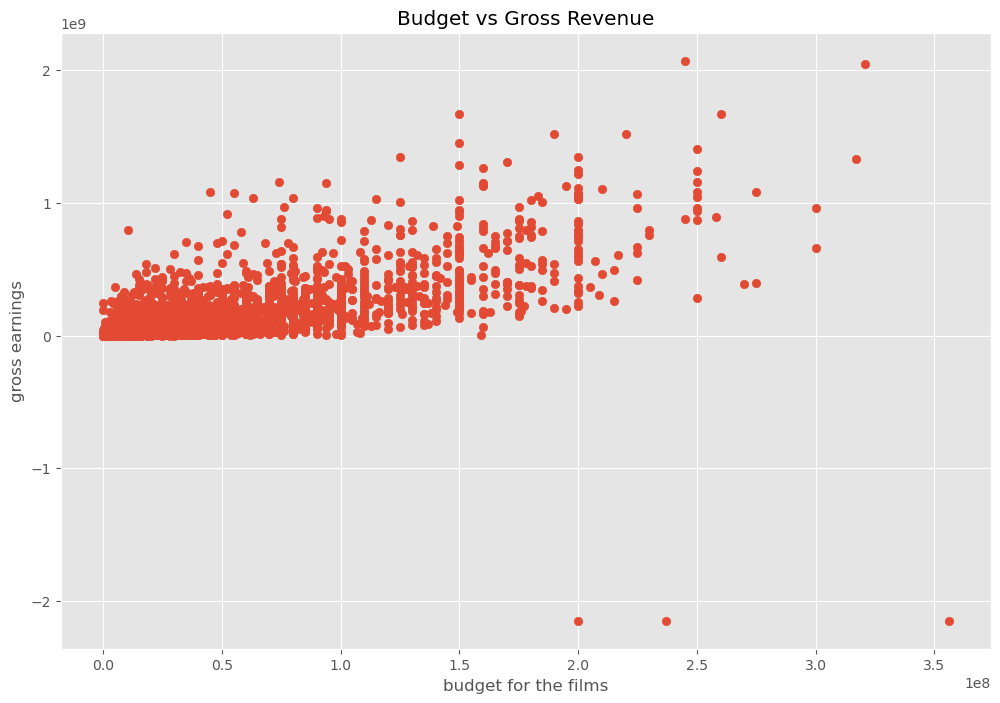

In [120]:
# Scatter plot of Budget vs Gross

plt.scatter(x = df1['budget'], y = df1['gross'])
plt.title('Budget vs Gross Revenue')
plt.xlabel('budget for the films')
plt.ylabel('gross earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

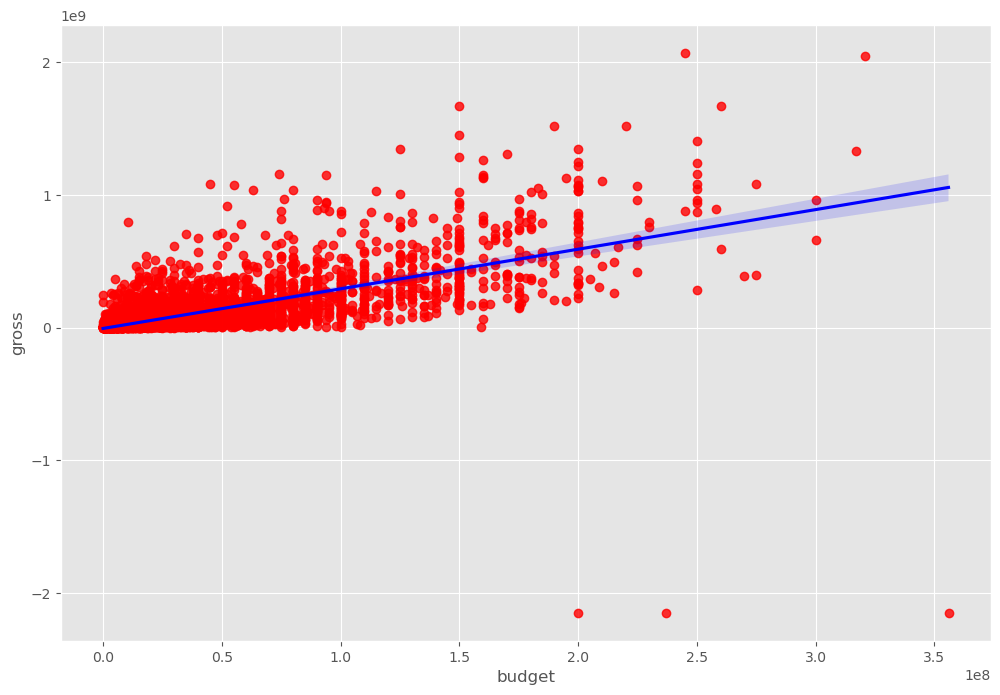

In [123]:
# we can see that it shows a positive correlation between budget and gross revenue.
# However, to get a better understanding of the correlation between budget and gross revenue, we will also do regression plot
# regplot using sns between budget and gross

sns.regplot(x = 'budget', y = 'gross', data = df1, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})

In [ ]:
# the line plotted in the above graph explains that the two columns are highly correlated to each other as it shows a 
# positive trace for both the values. The blue line clearly indicates that there is a positive correlation.

In [124]:
# checking for the correlation value using df.corr (this comes under pandas)

df1.corr()

#this df.corr() only gives the correlation value between the variables of datatypes int,float,etc and not string

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.267631,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.201086,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.550649,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.669203,0.318695
gross,0.267631,0.201086,0.550649,0.669203,1.000000,0.223667
runtime,0.075077,0.414068,0.352303,0.318695,0.223667,1.000000


In [125]:
# there are different types of correlation, out of which pearson correlation is by default that gets implemented
# when we execute the df.corr()
# the other correlations are kendall and spearman
# if we want to execute the other correlation then we need to specify them as follows
# pearson method measures the linear relationship ,ie.,straight line, value ranges from 0(no relation) to 1(high corr)
# kendall and spearman measures the monotonic relationship, i.e.,exponential curve, ranges from -1(negative corr), 
# 0 (no relation), 1(high corr)

print(df1.corr(method = 'pearson')) #this is default one and gives the same answer as df.corr()
print(df1.corr(method = 'kendall')) #this gives the corr values less than the pearson values
print(df1.corr(method = 'spearman')) #this gives the corr values either greater than or close to pearson values

             year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.267631  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.201086  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.550649  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.669203  0.318695
gross    0.267631  0.201086  0.550649  0.669203  1.000000  0.223667
runtime  0.075077  0.414068  0.352303  0.318695  0.223667  1.000000
             year     score     votes    budget     gross   runtime
year     1.000000  0.039389  0.296512  0.220833  0.238737  0.064824
score    0.039389  1.000000  0.350185 -0.006406  0.122862  0.292254
votes    0.296512  0.350185  1.000000  0.346274  0.551440  0.205344
budget   0.220833 -0.006406  0.346274  1.000000  0.509844  0.231278
gross    0.238737  0.122862  0.551440  0.509844  1.000000  0.174775
runtime  0.064824  0.292254  0.205344  0.231278  0.174775  1.000000
             year     score     votes    budget 

In [ ]:
# we can see that out of all the variables, budget and votes have the highest correlation with gross revenue.
# out of these two, votes have highest value when compared using kendall and spearman method and budget has the highest 
# when compared using pearson method

# Hence, by the above calculated corr values and plots (scatter plot and regression plot), we can say that our 
# hypothesis 1 is correct (Budget, Votes will have high relation with the gross).

In [ ]:
# Now we will plot the correlation matrix for the entire corr values between all the variables.
# For this we will store this as a matrix first and then plot the matrix using sns
# Heatmap is the best visualization for such correlation_matrix plots

Text(120.72222222222221, 0.5, 'Movie Features')

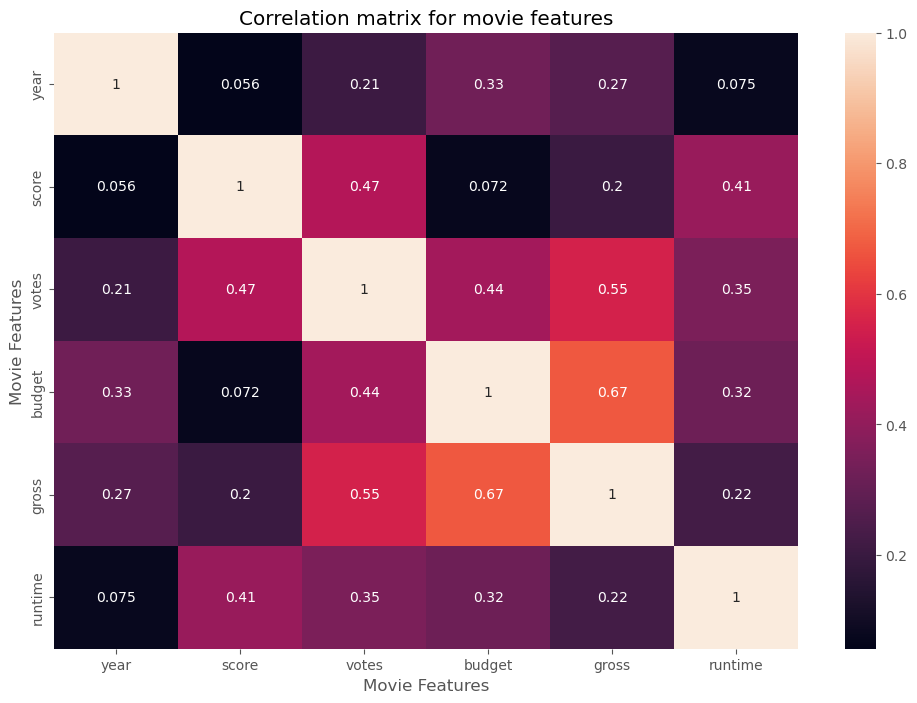

In [129]:
# heatmap for the pearson corr between all the variables

corr_matrix = df1.corr(method = 'pearson')
sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation matrix for movie features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [3]:
# Now we will check for our second hypothesis, Company is highly related to gross or not (company = non-numeric value)
# For this we will convert or give each company name a unique identifier or index and then compare it with gross values
# We can either convert company into random index or all the variables of type object at once.
# For now we will convert all the variables

df_categorized = df1

for cols in df_categorized.columns:
    if (df_categorized[cols].dtype == 'object'):
        df_categorized[cols] = df_categorized[cols].astype('category') #converts in to categorical datatype, where each company name will be treated as a category
        df_categorized[cols] = df_categorized[cols].cat.codes #this will give an index value to each category and it will be used as reference for all the repetitive values in the column
df_categorized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0


Text(120.58159722222221, 0.5, 'Movie Features')

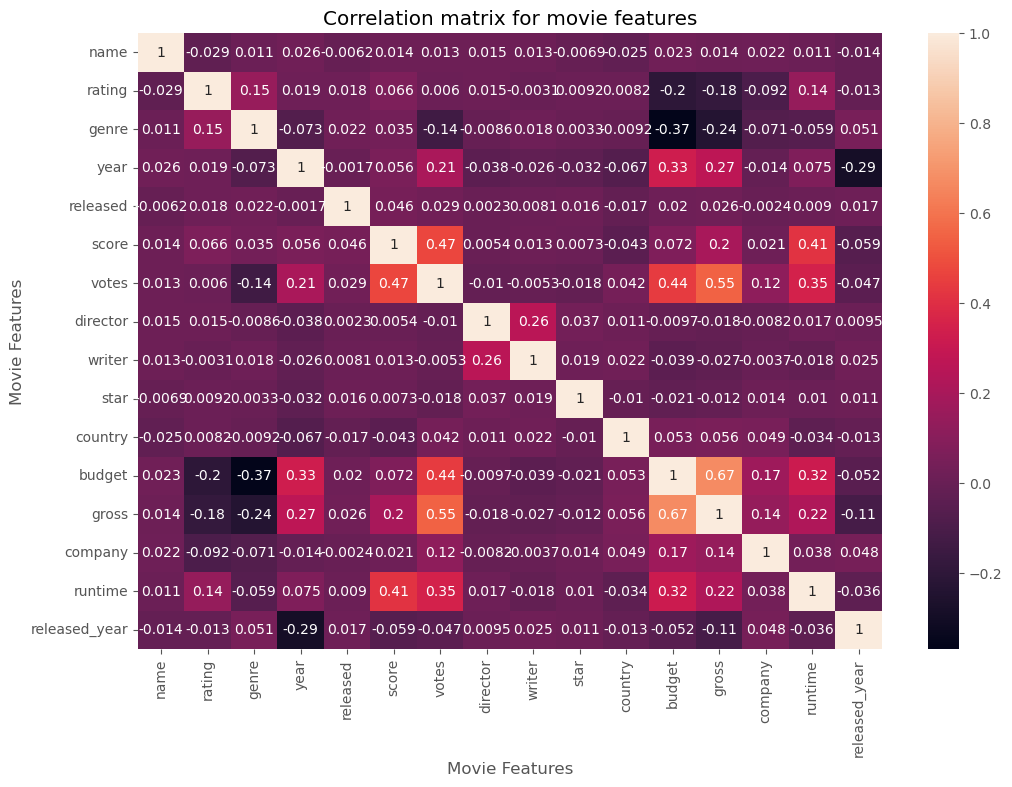

In [144]:
# Now we will create new correlation matrix with all the non-numeric values too into categorized format and check whether they
# have any effect on the gross revenue or not
# We will use heatmap for this too

corr_matrix_all = df_categorized.corr(method = 'pearson')
sns.heatmap(corr_matrix_all, annot = True)
plt.title('Correlation matrix for movie features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [150]:
# other way to find only the required correlation pairs is using unstack

corr_matrix_all_2 = df_categorized.corr()
corr_matrix_pairs = corr_matrix_all_2.unstack() # this gives an output where each variable is compared with every other variable along with its corr value
#corr_matrix_pairs

sorted_corr_pairs = corr_matrix_pairs.sort_values()
#sorted_corr_pairs

high_corr = sorted_corr_pairs[(sorted_corr_pairs) > 0.5]
high_corr

# Here we can see that, Budget and votes are highly related with gross revenue and not the company name
# Hence, our hypothesis 2 is not that accurate. (Company name is not highly related to gross revenue)

votes          gross            0.550649
gross          votes            0.550649
               budget           0.669203
budget         gross            0.669203
name           name             1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
writer         writer           1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
released       released         1.000000
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
released_year  released_year    1.000000
dtype: float64

Text(120.72222222222221, 0.5, 'Movie Features')

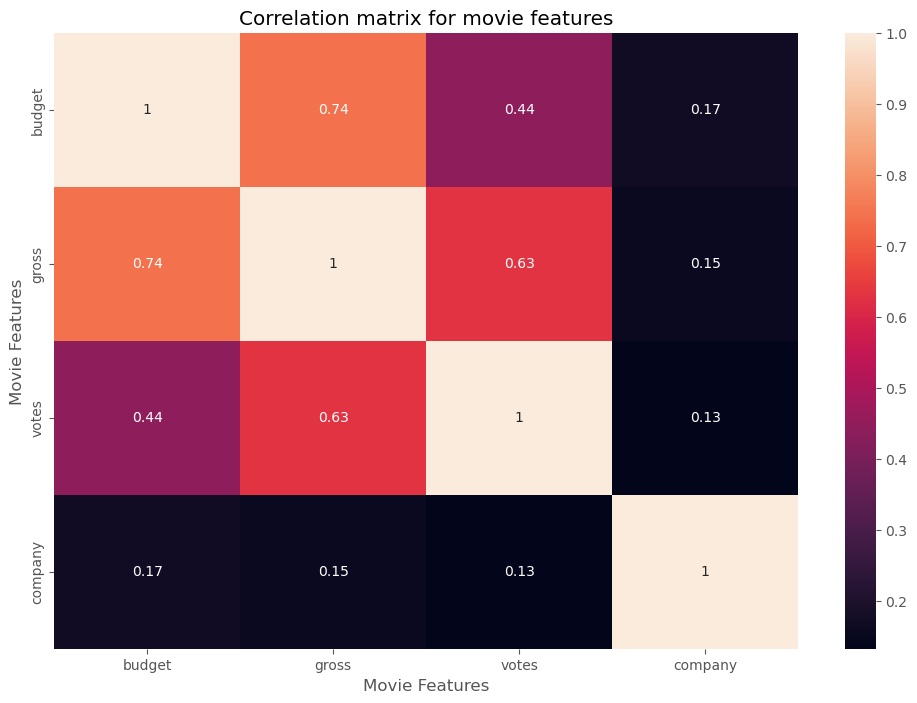

In [15]:
df_specific = pd.DataFrame(df_categorized[['budget','gross','votes','company']])

corr_matrix_specific = df_specific.corr(method = 'pearson')
sns.heatmap(corr_matrix_specific, annot = True)
plt.title('Correlation matrix for movie features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

# From the below heatmap, company has a very low relation with gross or we can say close to no relation.